In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
from google.colab import files

In [3]:
import torch
from torch import nn

#torchVision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

#matplotlib
import matplotlib.pyplot as plt


Getting The Data

In [4]:
train_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform = None,
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None,
)

100%|██████████| 26421880/26421880 [00:00<00:00, 27135410.65it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 4642946.50it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 11918637.15it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 10199469.53it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



Going Through the Data

In [5]:
len(train_data), len(test_data)

(60000, 10000)

In [6]:
class_name = train_data.classes
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
image,label = train_data[0]
print(image, label)
print(image.shape)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

(-0.5, 27.5, 27.5, -0.5)

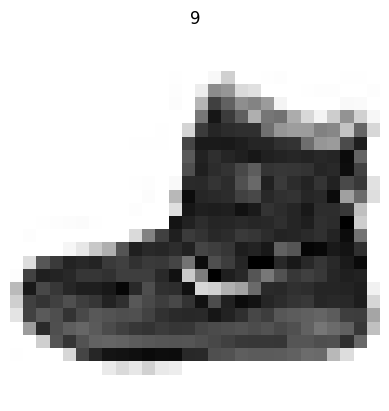

In [8]:
image , label = train_data[0]
plt.imshow(image.squeeze(), cmap="Greys")
plt.title(label)
plt.axis("off")

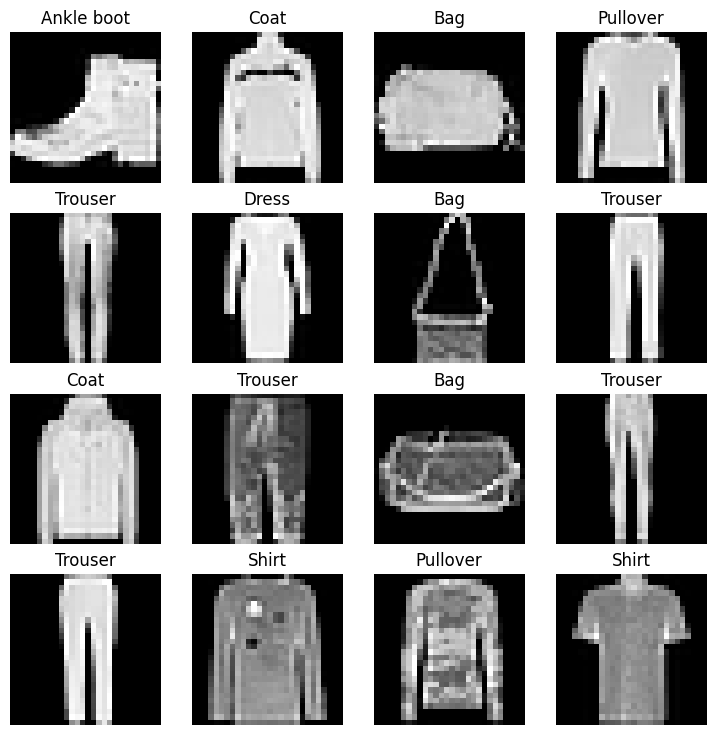

In [9]:
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_name[label])
    plt.axis(False);

Setting up the train and test DataLoaders

In [10]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)

test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=True)

print(f"Data Loaders: {train_dataloader , test_dataloader}")


Data Loaders: (<torch.utils.data.dataloader.DataLoader object at 0x7effe4d04b80>, <torch.utils.data.dataloader.DataLoader object at 0x7effe722f6d0>)


In [11]:
#Devce agnostic code
device = "cuda" if torch.cuda.is_available() == True else "cpu"
device

'cuda'

This has the same structure as the "TinyVGG" model

In [21]:
class FashionMNISTModel(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),            
            nn.MaxPool2d(kernel_size=2,
                         stride=2) )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        return x


model0 = FashionMNISTModel(input_shape=1, 
    hidden_units=10, 
    output_shape=len(class_name)).to(device)

In [13]:
random_image_tensor = torch.randn(size = (1,28,28))
random_image_tensor.shape

torch.Size([1, 28, 28])

In [14]:
model0(random_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.1188,  0.0230, -0.0250,  0.0897, -0.1278,  0.0339, -0.0939,  0.0977,
         -0.0304, -0.0569]], device='cuda:0', grad_fn=<AddmmBackward0>)

Setting up the train and test loops

In [15]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)
        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1))

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()
    with torch.inference_mode(): 
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            test_pred = model(X)

            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1)
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [22]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model0.parameters(), 
                             lr=0.05)

In [23]:
#Training the model
from tqdm import tqdm
from helper_functions import accuracy_fn
epochs = 30
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model0, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch: 0
---------


  3%|▎         | 1/30 [00:11<05:32, 11.46s/it]

Train loss: 0.63215 | Train accuracy: 77.24%
Epoch: 1
---------


  7%|▋         | 2/30 [00:22<05:20, 11.45s/it]

Train loss: 0.36080 | Train accuracy: 86.92%
Epoch: 2
---------


 10%|█         | 3/30 [00:34<05:11, 11.53s/it]

Train loss: 0.31807 | Train accuracy: 88.51%
Epoch: 3
---------


 13%|█▎        | 4/30 [00:46<05:00, 11.55s/it]

Train loss: 0.29390 | Train accuracy: 89.36%
Epoch: 4
---------


 17%|█▋        | 5/30 [00:58<04:52, 11.68s/it]

Train loss: 0.27669 | Train accuracy: 89.98%
Epoch: 5
---------


 20%|██        | 6/30 [01:09<04:40, 11.67s/it]

Train loss: 0.26522 | Train accuracy: 90.30%
Epoch: 6
---------


 23%|██▎       | 7/30 [01:21<04:28, 11.69s/it]

Train loss: 0.25469 | Train accuracy: 90.86%
Epoch: 7
---------


 27%|██▋       | 8/30 [01:33<04:17, 11.70s/it]

Train loss: 0.24680 | Train accuracy: 91.02%
Epoch: 8
---------


 30%|███       | 9/30 [01:44<04:05, 11.71s/it]

Train loss: 0.24286 | Train accuracy: 91.15%
Epoch: 9
---------


 33%|███▎      | 10/30 [01:56<03:56, 11.83s/it]

Train loss: 0.23542 | Train accuracy: 91.47%
Epoch: 10
---------


 37%|███▋      | 11/30 [02:08<03:45, 11.86s/it]

Train loss: 0.22894 | Train accuracy: 91.80%
Epoch: 11
---------


 40%|████      | 12/30 [02:20<03:32, 11.79s/it]

Train loss: 0.22488 | Train accuracy: 91.80%
Epoch: 12
---------


 43%|████▎     | 13/30 [02:32<03:22, 11.90s/it]

Train loss: 0.22086 | Train accuracy: 92.05%
Epoch: 13
---------


 47%|████▋     | 14/30 [02:44<03:11, 11.98s/it]

Train loss: 0.21780 | Train accuracy: 91.99%
Epoch: 14
---------


 50%|█████     | 15/30 [02:56<02:59, 11.99s/it]

Train loss: 0.21402 | Train accuracy: 92.31%
Epoch: 15
---------


 53%|█████▎    | 16/30 [03:08<02:46, 11.92s/it]

Train loss: 0.21200 | Train accuracy: 92.38%
Epoch: 16
---------


 57%|█████▋    | 17/30 [03:20<02:34, 11.88s/it]

Train loss: 0.20886 | Train accuracy: 92.48%
Epoch: 17
---------


 60%|██████    | 18/30 [03:32<02:22, 11.89s/it]

Train loss: 0.20478 | Train accuracy: 92.67%
Epoch: 18
---------


 63%|██████▎   | 19/30 [03:44<02:10, 11.88s/it]

Train loss: 0.20313 | Train accuracy: 92.61%
Epoch: 19
---------


 67%|██████▋   | 20/30 [03:56<01:58, 11.88s/it]

Train loss: 0.20198 | Train accuracy: 92.61%
Epoch: 20
---------


 70%|███████   | 21/30 [04:07<01:46, 11.79s/it]

Train loss: 0.19984 | Train accuracy: 92.64%
Epoch: 21
---------


 73%|███████▎  | 22/30 [04:19<01:33, 11.71s/it]

Train loss: 0.19872 | Train accuracy: 92.58%
Epoch: 22
---------


 77%|███████▋  | 23/30 [04:30<01:21, 11.70s/it]

Train loss: 0.19498 | Train accuracy: 92.92%
Epoch: 23
---------


 80%|████████  | 24/30 [04:42<01:10, 11.67s/it]

Train loss: 0.19433 | Train accuracy: 92.92%
Epoch: 24
---------


 83%|████████▎ | 25/30 [04:54<00:58, 11.68s/it]

Train loss: 0.19295 | Train accuracy: 93.02%
Epoch: 25
---------


 87%|████████▋ | 26/30 [05:05<00:46, 11.71s/it]

Train loss: 0.19125 | Train accuracy: 93.07%
Epoch: 26
---------


 90%|█████████ | 27/30 [05:17<00:35, 11.70s/it]

Train loss: 0.19133 | Train accuracy: 92.92%
Epoch: 27
---------


 93%|█████████▎| 28/30 [05:29<00:23, 11.70s/it]

Train loss: 0.18848 | Train accuracy: 93.12%
Epoch: 28
---------


 97%|█████████▋| 29/30 [05:40<00:11, 11.70s/it]

Train loss: 0.18779 | Train accuracy: 93.12%
Epoch: 29
---------


100%|██████████| 30/30 [05:52<00:00, 11.76s/it]

Train loss: 0.18650 | Train accuracy: 93.17%


In [24]:
test_step(data_loader=test_dataloader,
        model=model0,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

Test loss: 0.26826 | Test accuracy: 90.88%



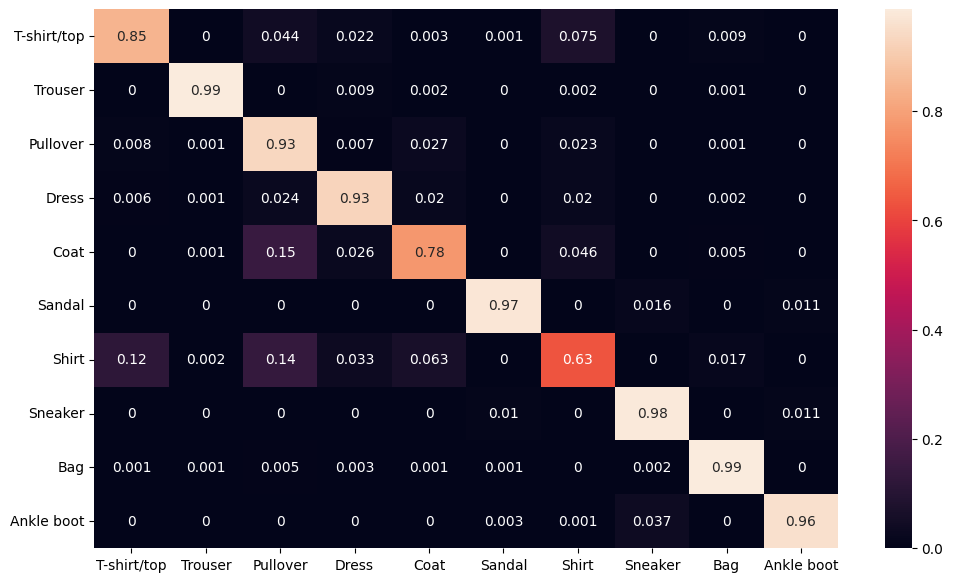

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import numpy as np
y_pred = []
y_true = []

# iterate over test data
for inputs, labels in test_dataloader:
        output = model0(inputs.to(device)) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

# constant for classes
classes = class_name

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')

In [20]:
# torch.save(model0.state_dict(), "FashionMNIST.dat")